In [5]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np
import transformers

In [6]:
# Load pre-trained InceptionV3 model for image classification
image_model = InceptionV3(weights='imagenet')

96112376/96112376 [==============================] - 1s 0us/step


In [7]:
# Load pre-trained DistilBERT model for text processing
text_model = transformers.DistilBertModel.from_pretrained('distilbert-base-uncased')

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [22]:
!wget https://images.unsplash.com/photo-1432405972618-c60b0225b8f9?q=80&w=2670&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D -O /content/image.png

/bin/bash: line 1: -O: command not found
--2024-02-01 22:00:50--  https://images.unsplash.com/photo-1432405972618-c60b0225b8f9?q=80
Resolving images.unsplash.com (images.unsplash.com)... 146.75.78.208, 2a04:4e42:84::720
Connecting to images.unsplash.com (images.unsplash.com)|146.75.78.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2624317 (2.5M) [image/jpeg]
Saving to: ‘photo-1432405972618-c60b0225b8f9?q=80.3’

photo-1432405972618 100%[===================>]   2.50M  --.-KB/s    in 0.06s   

2024-02-01 22:00:51 (38.6 MB/s) - ‘photo-1432405972618-c60b0225b8f9?q=80.3’ saved [2624317/2624317]



In [28]:
from google.colab import files
from IPython.display import Image

In [41]:
uploaded = files.upload()

Saving Man_on_snow.jpg.zip to Man_on_snow.jpg.zip


In [43]:
!unzip Man_on_snow.jpg.zip

Archive:  Man_on_snow.jpg.zip
  inflating: Man_on_snow.jpg         
  inflating: __MACOSX/._Man_on_snow.jpg  


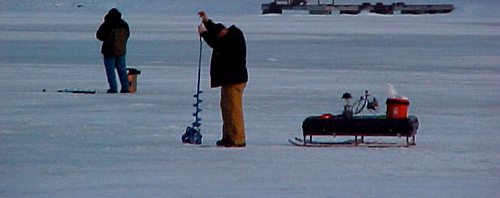

In [45]:
from PIL import Image
img = Image.open('Man_on_snow.jpg')
display(img)

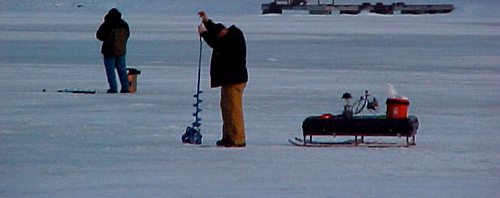

In [46]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = load_img('Man_on_snow.jpg')
display(img)

In [47]:
 # Sample text and image
sample_text = "Man standing on snow"
sample_image_path = "Man_on_snow.jpg"

In [48]:
# Process text using DistilBERT
tokenized_text = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-uncased')(sample_text, return_tensors='pt')
text_embedding = text_model(**tokenized_text).last_hidden_state.mean(dim=1)

In [49]:
# Process image using InceptionV3
img = image.load_img(sample_image_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
image_embedding = image_model.predict(img_array)
image_embedding = image_embedding.reshape(1, -1)


1/1 [==============================] - 3s 3s/step


In [50]:
# Concatenate text and image embeddings
multimodal_embedding = np.concatenate((text_embedding.detach().numpy(), image_embedding), axis=1)

In [51]:
# Now you can use multimodal_embedding for downstream tasks in NLP

print("Multimodal Embedding Shape:", multimodal_embedding.shape)


Multimodal Embedding Shape: (1, 1768)
